In [30]:
import pandas as pd
df = pd.read_csv("C:/Users/Home/Downloads/MD_agric_exam-4313.csv")
print(data)

     Field_ID  Elevation  Rainfall  Min_temperature_C  Max_temperature_C  \
0        1162  494.95615    1507.6               -5.4               31.0   
1        5108  663.73390     581.0               -4.7               30.9   
2        3504  396.87990    1715.1               -6.1               31.7   
3        5351  594.80370    1748.0               -4.3               33.6   
4         905  609.49800    1395.8               -4.5               31.3   
..        ...        ...       ...                ...                ...   
995      2202  572.95935     625.6               -5.5               31.0   
996      2531  552.80945     398.1               -5.9               33.4   
997      1040  678.22504     564.4               -4.6               31.7   
998        58  792.65370     928.5               -3.3               31.2   
999      3334  747.69850     981.5               -3.7               31.0   

           pH  Pollution_level  Plot_size  Annual_yield Crop_type  
0    6.859436      

In [8]:
#Number of unique crop types
num_unique_values = df['Crop_type'].nunique()
print(num_unique_values )

8


In [13]:
# Maximum annual yield for wheat rounded to 2 decimal places
wheat_df = df[df['Crop_type'] == 'wheat']
max_yield_wheat = wheat_df['Annual_yield'].max()
max_yield_wheat_rounded = round(max_yield_wheat, 2)

print(max_yield_wheat_rounded)

8.99


In [12]:
#Total rainfall for crop types where average pollution level is above 0.2
filtered_df = df.groupby('Crop_type').filter(lambda x: x['Pollution_level'].mean() > 0.2)
total_rainfall = filtered_df['Rainfall'].sum()

print(total_rainfall)

941959.7


In [14]:
# Temperature range functions

def calculate_temperature_range(field_id):
    # Filter the DataFrame for the specified Field_ID
    field_df = df[df['Field_ID'] == field_id]
    
    # Calculate the temperature range for the field
    temperature_range = field_df['Max_temperature_C'].max() - field_df['Min_temperature_C'].min()
    
    return temperature_range

# List of Field_IDs
field_ids = [1458, 1895, 5443]

# Calculate temperature range for each Field_ID and print the result
for field_id in field_ids:
    range_for_field = calculate_temperature_range(field_id)
    print(f"Temperature range for Field_ID {field_id}: {range_for_field}")


Temperature range for Field_ID 1458: 40.7
Temperature range for Field_ID 1895: 35.7
Temperature range for Field_ID 5443: 33.4


In [16]:
#crop with the lowest average minimum temperature
a = data['Crop_type'].unique()
b = float('inf')
c = ''

for crop in a:
    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()
    if d < b:
        b = d
        c = crop
print(c)

rice


In [21]:
#the total plot size for plots where ph is less than 5.5
total_plot_size = df.loc[df['pH'] < 5.5, 'Plot_size'].sum()

print(total_plot_size)


1731.8999999999999


In [22]:
#create a dataframe that has entries with a min_temperature <-5 and a max_temparature >30
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

print(filtered_df)

     Field_ID  Elevation  Rainfall  Min_temperature_C  Max_temperature_C  \
0        1162  494.95615    1507.6               -5.4               31.0   
2        3504  396.87990    1715.1               -6.1               31.7   
5        2274  270.45100    1665.2               -7.2               34.3   
13       4807  520.29770     292.3               -6.3               32.9   
14        973  432.03570    1464.4               -6.0               30.2   
..        ...        ...       ...                ...                ...   
990      1637  504.66306    1144.5               -5.7               32.1   
991       756  578.91270     889.4               -5.2               31.0   
992      1332  359.76013    1816.0               -6.4               32.9   
995      2202  572.95935     625.6               -5.5               31.0   
996      2531  552.80945     398.1               -5.9               33.4   

           pH  Pollution_level  Plot_size  Annual_yield Crop_type  
0    6.859436      

In [33]:
#calculate the standard dev of 'Rainfall' for plots where Plot_size is larger than the median plot size of the dataset, round to 2 decimal places
import numpy as np

# Calculate the median plot size
median_plot_size = np.median(df['Plot_size'])

# Filter the DataFrame for rows where Plot_size is larger than the median
filtered_df = df[df['Plot_size'] > median_plot_size]

# Calculate the standard deviation of Rainfall for the filtered rows
std_dev_rainfall = np.std(filtered_df['Rainfall'])

# Round the standard deviation to 2 decimal places
std_dev_rainfall_rounded = round(std_dev_rainfall, 2)

print(std_dev_rainfall_rounded)


469.62


In [24]:
#concatenate the first three digits of the most common Max_temperature_C with the last three letters of the least common Crop_type 

# Find the most common Max_temperature_C value
most_common_temp = df['Max_temperature_C'].value_counts().idxmax()

# Find the least common Crop_type value
least_common_crop = df['Crop_type'].value_counts().idxmin()

# Concatenate the first three digits of the most common Max_temperature_C with the last three letters of the least common Crop_type
concatenated_string = str(most_common_temp)[:3] + least_common_crop[-3:]

print(concatenated_string)


Concatenated string: 30.ice


In [27]:
# assuming each 'Crop_type' contributes an integer value equal to it length (e.g wheat contributes 5).
#Write a recursive function to sum the integer values for each unique crop type in the df
def sum_crop_type_lengths(df, unique_crop_types, index=0, total=0):
    # Base case: if index reaches the length of unique_crop_types, return the total sum
    if index == len(unique_crop_types):
        return total
    
    # Recursive case: calculate the length of the current crop type string
    crop_type_length = len(unique_crop_types[index])
    
    # Add the length to the total sum
    total += crop_type_length
    
    # Recur to the next crop type
    return sum_crop_type_lengths(df, unique_crop_types, index + 1, total)

# Get unique crop types from the DataFrame
unique_crop_types = df['Crop_type'].unique()

# Call the recursive function to calculate the sum of crop type lengths
total_length = sum_crop_type_lengths(df, unique_crop_types)

# Print the total sum
print(total_length)


Total sum of crop type lengths: 42


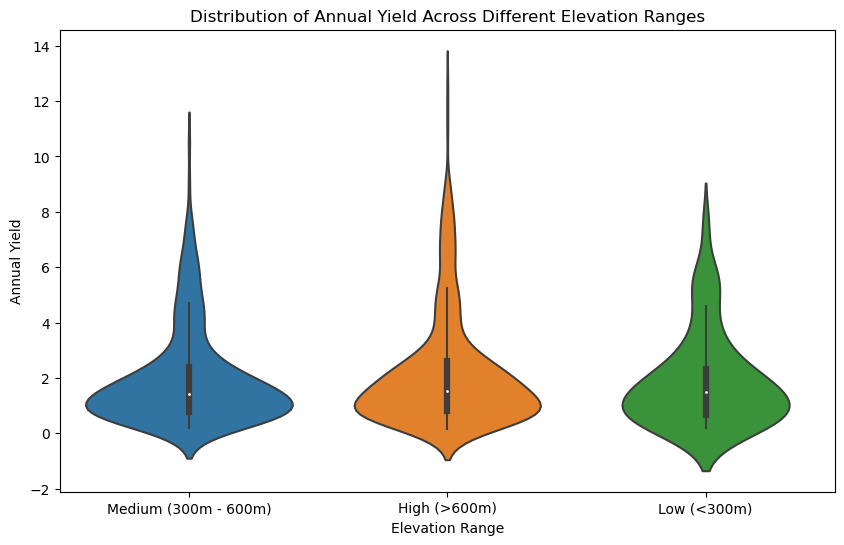

In [26]:
#Write python code to create a violin plot visualizing the distribution of 'Annual_yield' across different 'Elevation' ranges Use the provided eleveation 
#range categories (Low<300m, Medium: 300m -600m, High >600m) to categorize the data before plotting. Examine the violin plot displaying the 
#distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between the elevation
#ranges and annual yield distribution?

import seaborn as sns
import matplotlib.pyplot as plt

# Define elevation range categories
def categorize_elevation(elevation):
    if elevation < 300:
        return 'Low (<300m)'
    elif elevation >= 300 and elevation <= 600:
        return 'Medium (300m - 600m)'
    else:
        return 'High (>600m)'

# Apply elevation categorization to create a new column 'Elevation_Category'
df['Elevation_Category'] = df['Elevation'].apply(categorize_elevation)

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=df)
plt.title('Distribution of Annual Yield Across Different Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()


In [34]:
#perform a t-test comparing the average 'Annual_yield' between coffee and banana crop types . 
#what is the p vale rounded to 3 decimal places
from scipy.stats import ttest_ind

# Filter the DataFrame for coffee and banana crop types
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform the t-test
t_statistic, p_value = ttest_ind(coffee_yield, banana_yield)

# Round the p-value to 3 decimal places
rounded_p_value = round(p_value, 3)

print(rounded_p_value)


0.598
